# Plotting stuff for my research report, CSE527
I've two outputs (labels, 16S_pairs) with me b/c I had trouble accessing Waffle/DVC.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
sns.set_context('talk')

In [5]:
df_ogt = pd.read_csv('../data/taxa/labels.csv', index_col=0)

In [6]:
df_ogt.describe()

,ogt
count,4424.000000
mean,31.113743
std,8.568326
min,6.000000
25%,28.000000
50%,30.000000
75%,33.500000
max,105.000000


In [7]:
df_16s = pd.read_csv('../data/taxa_pairs/pairwise_16s_blast.csv', index_col=None)

In [8]:
df_16s.describe()

,thermo_index,meso_index,local_E_value,scaled_local_query_percent_id,scaled_local_symmetric_percent_id,local_gap_compressed_percent_id,local_average_coverage
count,750633.000000,750633.000000,7.506330e+05,750633.000000,750633.000000,750633.000000,750633.000000
mean,8457.502636,8082.160624,7.732823e-12,0.667429,0.605776,0.822348,0.798307
std,4862.021723,4646.578599,1.765127e-09,0.211535,0.244945,0.054200,0.228732
min,24.000000,5.000000,0.000000e+00,0.013170,0.021458,0.704718,0.022761
25%,3997.000000,4043.000000,0.000000e+00,0.643177,0.427087,0.790074,0.643901
50%,8529.000000,8043.000000,0.000000e+00,0.757962,0.688264,0.812166,0.852390
75%,12717.000000,12069.000000,1.170250e-104,0.801040,0.795761,0.834335,0.995348
max,16650.000000,16663.000000,7.548360e-07,1.000000,0.996439,1.000000,0.999450


In [9]:
meso_OGT = df_ogt.loc[df_16s['meso_index']]['ogt']

In [10]:
thermo_OGT = df_ogt.loc[df_16s['thermo_index']]['ogt']

In [11]:
assert len(meso_OGT) == len(thermo_OGT)

In [12]:
delta_OGT = thermo_OGT.values - meso_OGT.values

In [13]:
df_16s['delta_OGT'] = delta_OGT

In [14]:
df_16s.describe()

,thermo_index,meso_index,local_E_value,scaled_local_query_percent_id,scaled_local_symmetric_percent_id,local_gap_compressed_percent_id,local_average_coverage,delta_OGT
count,750633.000000,750633.000000,7.506330e+05,750633.000000,750633.000000,750633.000000,750633.000000,750633.000000
mean,8457.502636,8082.160624,7.732823e-12,0.667429,0.605776,0.822348,0.798307,25.851470
std,4862.021723,4646.578599,1.765127e-09,0.211535,0.244945,0.054200,0.228732,11.882097
min,24.000000,5.000000,0.000000e+00,0.013170,0.021458,0.704718,0.022761,1.000000
25%,3997.000000,4043.000000,0.000000e+00,0.643177,0.427087,0.790074,0.643901,17.000000
50%,8529.000000,8043.000000,0.000000e+00,0.757962,0.688264,0.812166,0.852390,24.500000
75%,12717.000000,12069.000000,1.170250e-104,0.801040,0.795761,0.834335,0.995348,32.500000
max,16650.000000,16663.000000,7.548360e-07,1.000000,0.996439,1.000000,0.999450,98.000000


<AxesSubplot:xlabel='local_average_coverage', ylabel='delta_OGT'>

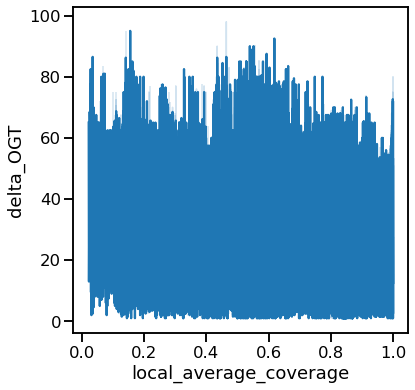

In [15]:
fig, ax = plt.subplots(figsize=(6,6))
sns.lineplot(data=df_16s, x='local_average_coverage', y='delta_OGT')
# ax.set_xlabel('')
# ax.set_ylabel('')